## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score

## Importing Dataset

In [2]:
cardiac = pd.read_csv("cardiac.csv")

In [3]:
cardiac

,caseno,age,weight,gender,fitness_score,cardiac_condition
0,1,37,70.47,Male,55.79,Absent
1,2,73,50.34,Female,35.00,Absent
2,3,46,87.65,Male,42.93,Present
3,4,36,89.80,Female,28.30,Present
4,5,34,103.02,Male,40.56,Absent
...,...,...,...,...,...,...
95,96,42,111.98,Male,33.73,Present
96,97,43,88.07,Male,49.22,Present
97,98,45,94.07,Male,41.97,Present
98,99,58,97.46,Male,35.20,Present


## Exploratory Data Analysis (EDA)

### Check for correct datatype and missing values

In [4]:
cardiac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   caseno             100 non-null    int64  
 1   age                100 non-null    int64  
 2   weight             100 non-null    float64
 3   gender             100 non-null    object 
 4   fitness_score      100 non-null    float64
 5   cardiac_condition  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


### Descriptive Stats

In [5]:
cardiac.describe().T

,count,mean,std,min,25%,50%,75%,max
caseno,100.0,50.5000,29.011492,1.00,25.7500,50.50,75.2500,100.00
age,100.0,41.1000,9.142530,30.00,34.0000,39.00,45.2500,74.00
weight,100.0,79.6603,15.089842,50.00,69.7325,79.24,89.9125,115.42
fitness_score,100.0,43.6298,8.571306,27.35,36.5950,42.73,49.2650,62.50


### Checking for Outliers

<AxesSubplot:>

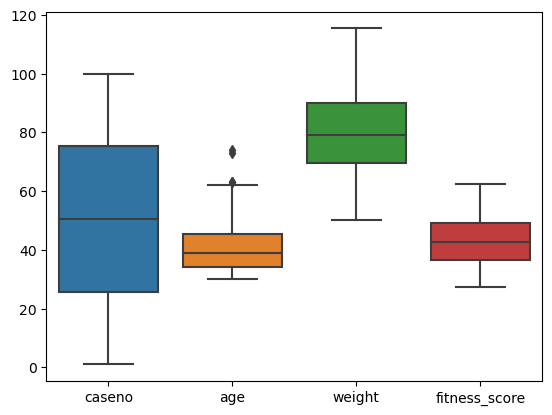

In [6]:
sns.boxplot(data= cardiac)

### Encoding the categorical variables

In [7]:
lab_enc = LabelEncoder()

In [8]:
cardiac['gender'] = lab_enc.fit_transform(cardiac['gender'])
cardiac['cardiac_condition'] = lab_enc.fit_transform(cardiac['cardiac_condition'])

### Correlations

<AxesSubplot:>

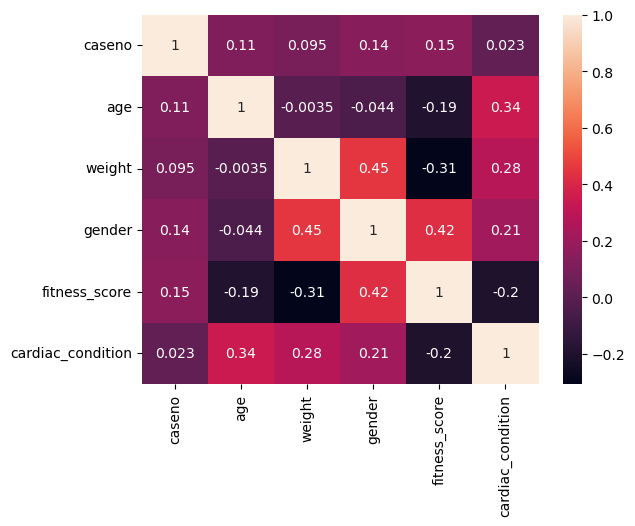

In [9]:
correlations = cardiac.corr()
sns.heatmap(correlations, annot=True)

### Removing unnessary columns

In [10]:
cardiac = cardiac.drop(columns=['caseno'])

In [11]:
cardiac

,age,weight,gender,fitness_score,cardiac_condition
0,37,70.47,1,55.79,0
1,73,50.34,0,35.00,0
2,46,87.65,1,42.93,1
3,36,89.80,0,28.30,1
4,34,103.02,1,40.56,0
...,...,...,...,...,...
95,42,111.98,1,33.73,1
96,43,88.07,1,49.22,1
97,45,94.07,1,41.97,1
98,58,97.46,1,35.20,1


## Data Modelling

In [12]:
X = cardiac[['age','weight','gender','fitness_score']]
Y = cardiac.cardiac_condition

#### Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state=22220861)


#### Define the Model

In [14]:
logit = LogisticRegression()

#### Fit the Model

In [15]:
logit_fit = logit.fit(X_train,y_train)

#### Predict the cardiac_condition on testing data

In [16]:
cardiac_con_pred = logit.predict(X_test)
cardiac_con_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1])

## Evaluation Metrics

In [17]:
con_matrix = confusion_matrix(y_test, cardiac_con_pred)

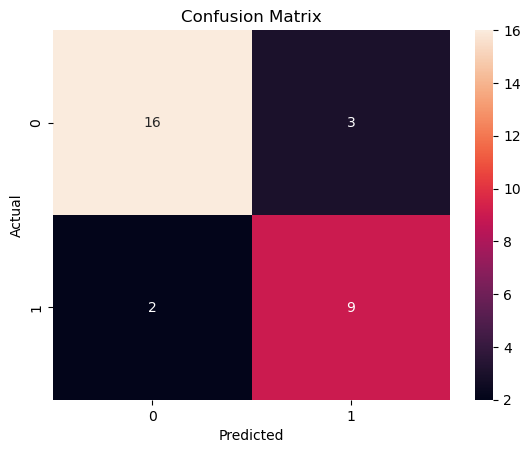

In [18]:
sns.heatmap(con_matrix, annot=True,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print(classification_report(y_test, cardiac_con_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.75      0.82      0.78        11

    accuracy                           0.83        30
   macro avg       0.82      0.83      0.82        30
weighted avg       0.84      0.83      0.83        30



In [20]:
print("Accuracy:",round(accuracy_score(y_test,cardiac_con_pred),2))
print("Precision:",round(precision_score(y_test, cardiac_con_pred),2))
print("Recall:", round(recall_score(y_test, cardiac_con_pred),2))
print("F1_Score:",round(f1_score(y_test,cardiac_con_pred),2))
print("ROC_AUC Score:",round(roc_auc_score(y_test,cardiac_con_pred),2) )

Accuracy: 0.83
Precision: 0.75
Recall: 0.82
F1_Score: 0.78
ROC_AUC Score: 0.83
